In [8]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
// from https://stackoverflow.com/questions/36757301/disable-ipython-notebook-autoscrolling
// disable scroll

<IPython.core.display.Javascript object>

In [13]:
import math
import matplotlib.pyplot as plt
import numpy as np

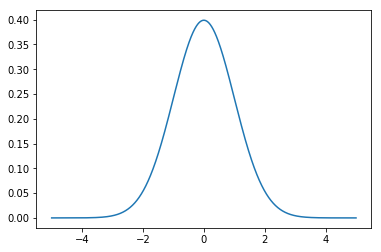

In [2]:
x = np.linspace(-5, 5, 5000)
y = math.e**(-x**2/2)/math.sqrt(2*math.pi)
plt.plot(x, y);

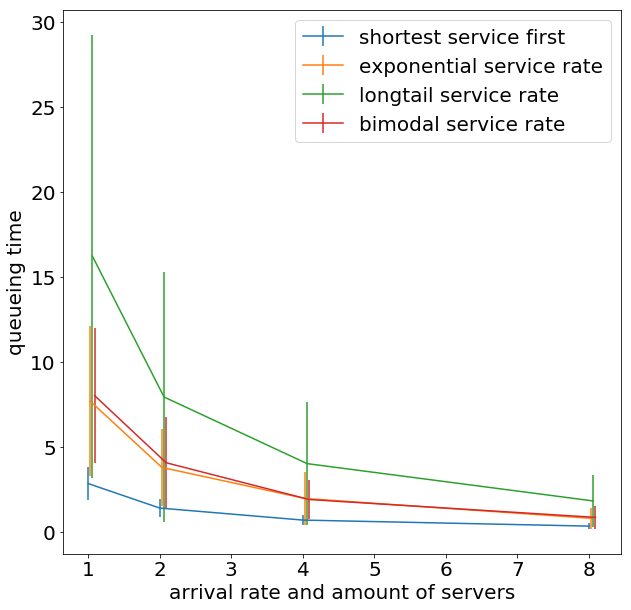

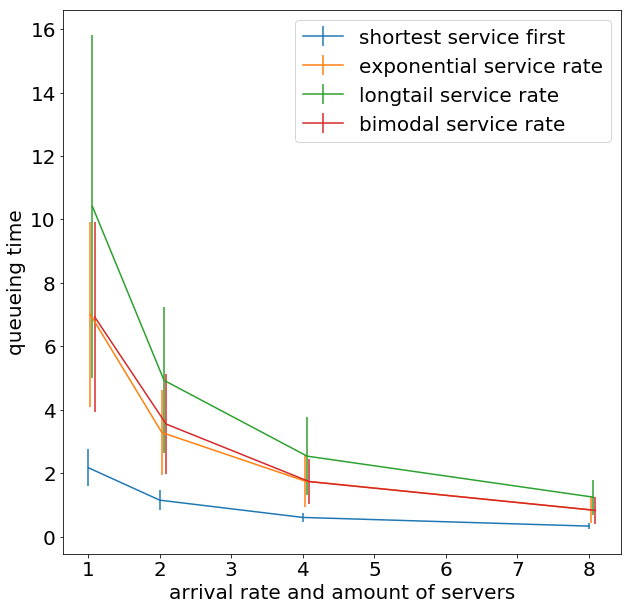

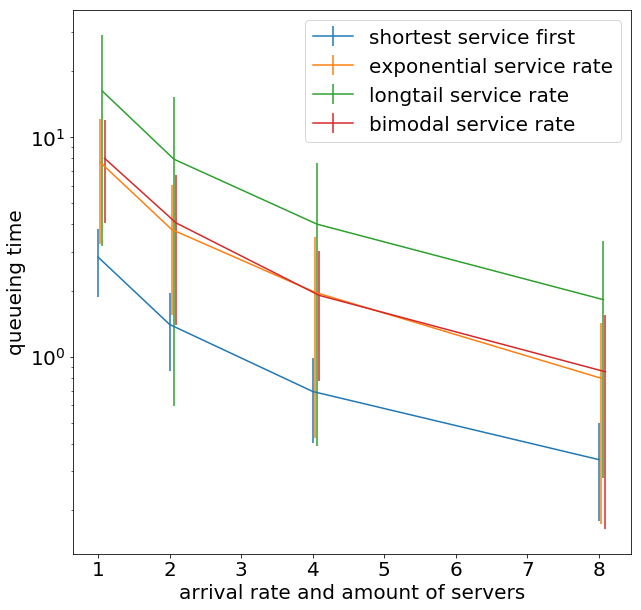

In [25]:
# waiting time, standard plot of the mean and standard devation
labelList = ['shortest service first','exponential service rate','longtail service rate','bimodal service rate']

# mean mean
mean = [[2.841221013, 1.400890185, 0.69350736, 0.339385279],\
       [7.678722591, 3.791439864, 1.964056561, 0.797141592],\
       [16.20597471, 7.932737018, 4.013875002, 1.81809191],\
       [8.012524125, 4.066038797, 1.901449905, 0.853037081]]
# standard deviation of the means
std = [[0.981164412, 0.541011425, 0.291348148, 0.160724502],\
      [4.402575851, 2.251030331, 1.536606596, 0.624683194],\
      [13.02192423, 7.339213758, 3.620503599, 1.537769241],\
      [3.965794185, 2.676276868, 1.123280653, 0.689305222]]
# mean of the standard deviations
meanStd = [[2.175353282,1.150544781,0.606438368,0.332883019],\
          [7.00202061,3.283008798,1.753379409,0.844851804],\
          [10.40768808,4.927847966,2.538274692,1.245550788],\
          [6.929702242,3.549288319,1.735535604,0.828320681]]
# standard deviation of the standard deviations
stdStd = [[0.57503258,0.322389853,0.149483775,0.094192518],\
         [2.918376882,1.335297494,0.833568762,0.423486368],\
         [5.410783765,2.298534698,1.237362818,0.550266176],\
          [3.004677939,1.584825763,0.71140527,0.423351994]]


# create slight room in the x axis to be able to see the standard deviations
plots = len(labelList)
LambdaAndN = [[1,2,4,8]]
for plotNumber in range(plots - 1):
    LambdaAndN.append([])
    for serviceTimeAndServer in LambdaAndN[0]:
        LambdaAndN[plotNumber + 1].append(serviceTimeAndServer + 0.03*(plotNumber + 1))

# plot mean with normal axes        
plt.figure(figsize=(10,10))
for plot in range(plots):
    plt.errorbar(LambdaAndN[plot], mean[plot], yerr = std[plot], label  = labelList[plot])
plt.legend()
plt.xlabel('arrival rate and amount of servers')
plt.ylabel('queueing time')
plt.show();

# plot standard deviation with normal axes        
plt.figure(figsize=(10,10))
for plot in range(plots):
    plt.errorbar(LambdaAndN[plot], meanStd[plot], yerr = stdStd[plot], label  = labelList[plot])
plt.legend()
plt.xlabel('arrival rate and amount of servers')
plt.ylabel('queueing time')
plt.show();

# plot with logarithmic y axis
plt.figure(figsize=(10,10))
for plot in range(plots):
    plt.errorbar(LambdaAndN[plot], mean[plot], yerr = std[plot], label  = labelList[plot])
plt.legend()
plt.xlabel('arrival rate and amount of servers')
plt.ylabel('queueing time')
plt.yscale("log")
plt.show();

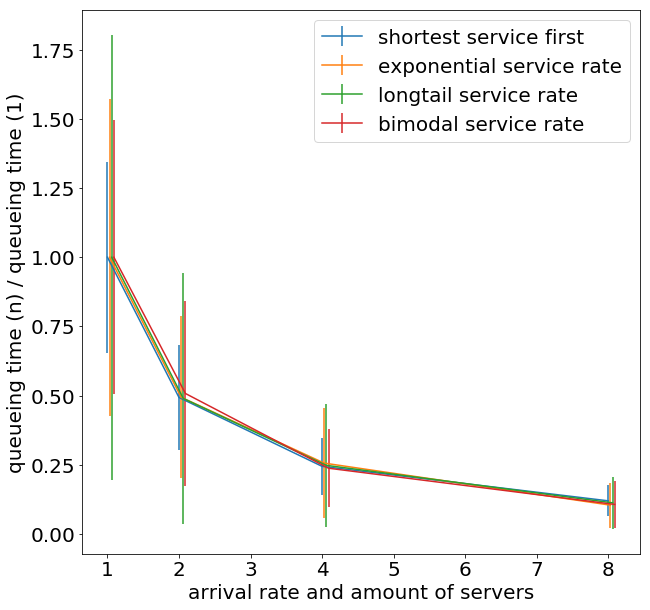

In [26]:
# waiting time, relative to waiting time for a shop with a single server
labelList = ['shortest service first','exponential service rate','longtail service rate','bimodal service rate']

mean = [[2.841221013, 1.400890185, 0.69350736, 0.339385279],\
       [7.678722591, 3.791439864, 1.964056561, 0.797141592],\
       [16.20597471, 7.932737018, 4.013875002, 1.81809191],\
       [8.012524125, 4.066038797, 1.901449905, 0.853037081]]
std = [[0.981164412, 0.541011425, 0.291348148, 0.160724502],\
      [4.402575851, 2.251030331, 1.536606596, 0.624683194],\
      [13.02192423, 7.339213758, 3.620503599, 1.537769241],\
      [3.965794185, 2.676276868, 1.123280653, 0.689305222]]

# create slight room in the x axis to be able to see the standard deviations
plots = len(labelList)
LambdaAndN = [[1,2,4,8]]
for plotNumber in range(plots - 1):
    LambdaAndN.append([])
    for serviceTimeAndServer in LambdaAndN[0]:
        LambdaAndN[plotNumber + 1].append(serviceTimeAndServer + 0.03*(plotNumber + 1))

# scale the mean to the mean at 1 server        
correctedMean = []
for plot in range(plots):
    correctedMean.append([])
    for number in range(plots):
        #print correctedMean[plot][number],'/',mean[plot][0]
        correctedMean[plot].append(mean[plot][number]/mean[plot][0])

# scale the standard deviation to the std at 1 server        
correctedStd = []
for plot in range(plots):
    correctedStd.append([])
    for number in range(plots):
        #print correctedMean[plot][number],'/',mean[plot][0]
        correctedStd[plot].append(std[plot][number]/mean[plot][0])        
        
plt.figure(figsize=(10,10))
for plot in range(plots):
    plt.errorbar(LambdaAndN[plot], correctedMean[plot], yerr = correctedStd[plot], label  = labelList[plot])
#plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.) #place legend in graph to save space
plt.legend()
plt.xlabel('arrival rate and amount of servers')
plt.ylabel('queueing time (n) / queueing time (1)')
plt.show();

2.8939012904608545
8.541565943362627


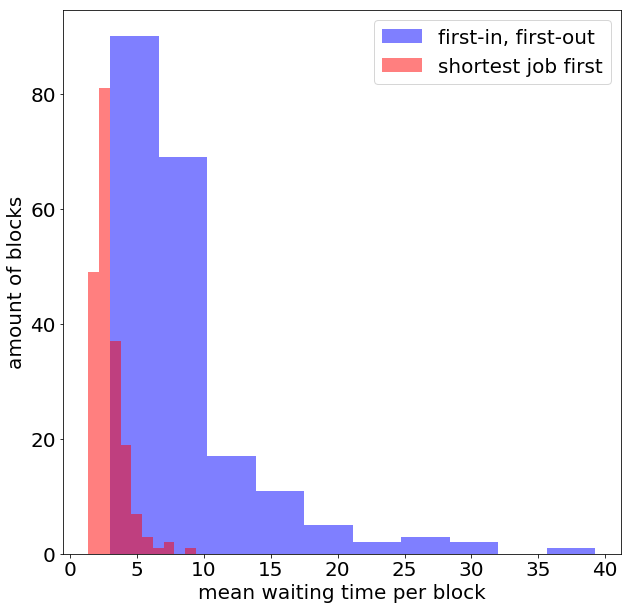

In [24]:
"""
Histogram to compare shortest job first with first in first out
"""
meansSJF = [2.6614181512543933, 3.994716064779376, 1.9550367397854758, 1.9121177178830717, 2.7960937534487775, 3.7081816495351205, 2.3861145291376387, 2.8939409942749315, 4.7581299392416545, 3.8745367365061045, 1.8460486848226556, 3.9379012117213734, 1.9874707074178095, 2.016097998899466, 1.81236451960876, 2.304796413588323, 3.321026018951121, 1.8363208715885484, 7.6665096316847885, 4.127894488787235, 5.4072740286107726, 4.023297534337933, 2.7083684569580364, 4.380818179559465, 6.203002142407237, 2.2023825958850467, 3.9022939675728847, 2.0775652791995927, 3.3647982700274004, 2.3427932593465446, 1.4024676074997915, 2.543400274917418, 2.4071271442713624, 2.217981635259428, 1.9423173894785868, 3.0680539233452144, 2.923321386698561, 3.9021832840063655, 4.391114268569327, 2.2572119738200054, 2.999203865549636, 4.010121920164297, 2.3878754025464803, 1.7965583246253591, 2.4113103781052705, 2.099780209758341, 3.1435615435928046, 3.238773832476465, 2.4034486564097532, 2.771069460393541, 3.520770548030974, 1.9233764323796423, 4.543514464038286, 2.630665622307948, 2.159065015364176, 7.589118862060917, 2.761169337365427, 3.415714901887695, 2.9804516618117343, 2.657162451174707, 2.534302253885573, 3.1476768008866203, 2.3687894143780577, 1.8191740288159344, 2.455860739593496, 2.81334570429851, 2.4919130505992944, 3.284605083233459, 2.540581161071226, 2.525135968324379, 2.9865618220476464, 5.056960809038035, 4.637129758064067, 2.497603145395609, 1.84932896891571, 2.0666429685458425, 3.042592479532599, 2.309727916968739, 2.7362575336418957, 2.7002581754724524, 2.913926427395927, 3.615693642908911, 2.365894234619991, 2.496469823735475, 2.132813629703116, 2.8817066510899165, 2.0045392762680567, 1.808974424121363, 2.952908241943427, 2.199431898854498, 1.8961902685032546, 4.270609768781258, 2.658047745275966, 3.20800885101578, 2.7684653859918473, 2.67137905204916, 1.9150252397541043, 3.898148894232174, 1.9287423373045312, 1.9290621577587443, 2.585335757494133, 2.566795804460664, 3.1084534094487606, 3.4587378031254774, 4.883915415273164, 3.18954866851063, 2.124898829300233, 1.8907698160616129, 3.3830269607795054, 4.416742047195119, 2.29389485313982, 2.6591603656274385, 2.4440077208082656, 1.749488154758059, 2.686856457470218, 3.1770460085464003, 3.440037662271323, 1.903510861018236, 2.376798117683531, 4.019560284192761, 2.597409535790386, 2.5474411226169034, 2.277773119182151, 2.419504979201767, 2.582573618110182, 1.8863255315608112, 2.0088215424600637, 1.6300971375328082, 2.147708599516889, 4.281174704672856, 3.170780641911668, 2.9613602633680856, 2.115771392135968, 1.935800406676135, 2.5136374539433746, 1.7901655615757337, 1.9644350975467533, 2.4348496523824577, 3.355903365575563, 3.0764216979462655, 3.3906473984326584, 2.9525198709419636, 2.521258042913425, 4.249899083691271, 2.3124468138565715, 3.5244721564121138, 2.7507366951493895, 2.131334458530444, 2.2886670911565017, 2.4177870568620854, 2.9067390791420182, 2.3982838619183457, 3.5930537885386147, 3.4847036482012483, 2.5394373047284318, 9.403301681726239, 3.034531699726911, 2.536163047726033, 1.9973202114707382, 2.004986414617859, 1.451939108083432, 2.0394325480638944, 2.7462706621811375, 2.052761585351895, 2.5213198014156077, 2.0921095264943723, 5.401596708863449, 2.042695482714771, 1.7971682512446423, 2.4706078852642968, 1.9676730206885842, 3.195234930580977, 2.670200743505644, 4.059737557277287, 5.124764784639847, 2.3949570002685943, 3.2118995598382027, 2.32434903282029, 2.8026010823272225, 2.2841724820671954, 4.271693185374955, 2.3341146534146975, 2.244319379190303, 1.8969218452144705, 1.9049019559104636, 2.495194601662224, 3.610750189597602, 2.929899980910675, 2.948453301607864, 2.421715196655976, 2.873172003842279, 2.281372675624327, 2.4132109665054013, 2.0611467661179192, 4.907590639136062, 3.2505979886607093, 5.4729698111453615, 2.022822835850675, 4.666245177891862, 1.3391553088030195]
meansFIFO = [4.466316942525484, 3.316279526768546, 10.123035732382093, 6.847634039093877, 8.05815906693973, 5.943663476548988, 4.011725274302578, 8.531101908178828, 4.516690588771978, 4.416907125022815, 8.296986014616401, 3.8783424416767573, 6.062798354337603, 7.349127848399093, 5.660526310053057, 5.035947804344057, 13.88954591705967, 10.161523112799834, 6.684815627124863, 7.550529337055407, 8.008130943316354, 8.813722231999746, 5.475122645488736, 5.286871860778349, 22.882132441653262, 9.875866708557401, 4.610584320966828, 4.651778729421458, 12.434756768527674, 5.560297512141784, 7.348433181239358, 14.29228413413321, 5.570201788458617, 3.9011594316032716, 12.208198595289133, 7.1574280690449665, 5.23847098511309, 9.99056635327221, 9.039689346435908, 7.294428935584212, 5.115812697497, 5.621845676170735, 2.983995406018308, 12.675555080126593, 21.66553744584458, 9.35895902906188, 4.5258723197674335, 7.763251473612021, 4.287514206067855, 9.451090093118218, 39.27600756857944, 31.736881841299628, 4.135531757559314, 9.19105570482216, 16.244714873506737, 7.6822130635270875, 5.497355561160177, 6.066774658852955, 8.300015124056983, 4.79773851324532, 3.4722781033453796, 26.68947203206933, 31.76125075044672, 11.535352101986428, 6.008079899292498, 7.314632898528521, 15.108972147832057, 5.211428060408624, 9.429962789863959, 9.332719226142085, 10.83393158776345, 4.726401315944735, 10.531602325013955, 4.797525133561052, 3.7102505769127747, 19.640496807167978, 4.343398759379212, 8.966905672069508, 6.526440936397121, 6.223402850958577, 20.926033826397646, 5.847573967937992, 4.346789768842471, 8.600192375090758, 6.605115234803292, 6.7137304961103945, 11.974084426482877, 13.874866172779278, 5.4455807612252976, 17.03402643478825, 10.171628588513355, 6.162898788796418, 4.29230062929634, 12.630444093746672, 6.870781757914083, 9.141164195008038, 3.9967551567513584, 8.741876001871221, 3.805912584262958, 5.452510185877196, 6.304426031214258, 7.995089446247832, 5.9749669735814965, 7.638029523529433, 7.567900604336129, 11.986505369482039, 5.387165204679594, 6.217251026955913, 5.074491783101373, 12.247741286655975, 3.0259431667124446, 20.893305520790367, 6.790419641685614, 5.688541378673894, 11.974600709114224, 6.280303832677513, 5.349230519699893, 5.699643107929558, 7.230115182085632, 25.293503472391254, 5.9357191317586695, 15.14675326284385, 7.770323615506524, 4.270234136500803, 6.872604913817224, 8.054876843255478, 6.449271240778034, 9.981861614534603, 6.059346419075446, 18.714094702542557, 7.5579314544776866, 20.31448490093459, 6.914199158963369, 15.176860533860308, 3.588993337259919, 4.9098961176839655, 8.94423774175832, 14.498203949194721, 3.9641816840444806, 4.7640810691040825, 6.189665073190729, 9.236459450133028, 9.170112989726942, 7.8587320502910005, 8.690380318858486, 11.743546805566234, 8.525219333799207, 6.7565849192369205, 4.27455819444923, 10.531670669346058, 7.350904058110289, 6.098314576210163, 3.789086414592137, 12.336717913834581, 7.44375483006952, 4.267842041047436, 4.77944931956596, 10.941827064270328, 5.0823413270642925, 4.262475861527462, 26.404950577080015, 8.566244431965403, 7.123360495392816, 5.424937853879877, 4.668900130310037, 16.16237365718375, 5.503673391796445, 3.6680835240554006, 5.843417903732247, 13.581998180279712, 9.317870767457352, 8.89028477055265, 15.84267466708977, 8.185356988306914, 4.374103056697262, 4.815660703201924, 5.197275308505167, 7.111507944542361, 5.207977969943604, 4.532780098773364, 3.365404765078536, 8.747807461316349, 8.927181041659177, 6.073774231943011, 7.281933337608003, 7.517367714620341, 6.6826942092072565, 4.040012064495997, 6.874921868480305, 4.050730639962159, 8.612633984073211, 4.846932264720759, 5.742167270867503, 10.315648559179536, 7.132145666794036, 9.335734718106862, 6.383866157699784, 5.305641824123712, 6.972558809244685, 6.225353895767767]
print np.mean(meansSJF)
print np.mean(meansFIFO)

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

plt.figure(figsize=(10,10))
plt.hist(meansFIFO, alpha = 0.5, color='b', label='first-in, first-out')
plt.hist(meansSJF, alpha = 0.5, color='r', label='shortest job first')
plt.xlabel('mean waiting time per block')
plt.ylabel('amount of blocks')
plt.legend()
plt.show;